# 分析Z500上各个模型的性能

In [2]:
import sys
sys.path.append("../")
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
from src.utils.plot import subplot_daloop
from src.utils.data_utils import NAME_TO_VAR

In [3]:
FORECAST_DIR = "../../results/medium_forecast"
ERA5_DIR = "../../data/era5"
VARIABLE = "geopotential"
LEVEL = 500
RESOLUTION = 5.625

In [4]:
gt = xr.open_mfdataset(f"{ERA5_DIR}/{VARIABLE}_{LEVEL}_{RESOLUTION}deg/test/*.nc", combine="by_coords")

## 绘制同化预报循环误差

In [5]:
rmse_4dvar_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/rmse_4dvar_obspartial0.2.nc", combine="by_coords")
rmse_4dvarnet_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/rmse_4dvarnet_obspartial0.2.nc", combine="by_coords")
rmse_vit_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/rmse_vit_obspartial0.2.nc", combine="by_coords")
rmse_4dvarcyclegan_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/rmse_4dvarcyclegan_wscale_obspartial0.2.nc", combine="by_coords")

acc_4dvar_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/acc_4dvar_obspartial0.2.nc", combine="by_coords")
acc_4dvarnet_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/acc_4dvarnet_obspartial0.2.nc", combine="by_coords")
acc_vit_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/acc_vit_obspartial0.2.nc", combine="by_coords")
acc_4dvarcyclegan_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/acc_4dvarcyclegan_wscale_obspartial0.2.nc", combine="by_coords")

mae_4dvar_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/mae_4dvar_obspartial0.2.nc", combine="by_coords")
mae_4dvarnet_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/mae_4dvarnet_obspartial0.2.nc", combine="by_coords")
mae_vit_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/mae_vit_obspartial0.2.nc", combine="by_coords")
mae_4dvarcyclegan_obs20 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.2/mae_4dvarcyclegan_wscale_obspartial0.2.nc", combine="by_coords")

In [6]:
rmse_4dvar_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/rmse_4dvar_obspartial0.15.nc", combine="by_coords")
rmse_4dvarnet_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/rmse_4dvarnet_obspartial0.15.nc", combine="by_coords")
rmse_vit_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/rmse_vit_obspartial0.15.nc", combine="by_coords")
rmse_4dvarcyclegan_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/rmse_4dvarcyclegan_wscale_obspartial0.15.nc", combine="by_coords")

acc_4dvar_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/acc_4dvar_obspartial0.15.nc", combine="by_coords")
acc_4dvarnet_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/acc_4dvarnet_obspartial0.15.nc", combine="by_coords")
acc_vit_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/acc_vit_obspartial0.15.nc", combine="by_coords")
acc_4dvarcyclegan_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/acc_4dvarcyclegan_wscale_obspartial0.15.nc", combine="by_coords")

mae_4dvar_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/mae_4dvar_obspartial0.15.nc", combine="by_coords")
mae_4dvarnet_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/mae_4dvarnet_obspartial0.15.nc", combine="by_coords")
mae_vit_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/mae_vit_obspartial0.15.nc", combine="by_coords")
mae_4dvarcyclegan_obs15 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.15/mae_4dvarcyclegan_wscale_obspartial0.15.nc", combine="by_coords")

In [7]:
rmse_4dvar_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/rmse_4dvar_obspartial0.1.nc", combine="by_coords")
rmse_4dvarnet_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/rmse_4dvarnet_obspartial0.1.nc", combine="by_coords")
rmse_vit_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/rmse_vit_obspartial0.1.nc", combine="by_coords")
rmse_4dvarcyclegan_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/rmse_4dvarcyclegan_wscale_obspartial0.1.nc", combine="by_coords")

acc_4dvar_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/acc_4dvar_obspartial0.1.nc", combine="by_coords")
acc_4dvarnet_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/acc_4dvarnet_obspartial0.1.nc", combine="by_coords")
acc_vit_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/acc_vit_obspartial0.1.nc", combine="by_coords")
acc_4dvarcyclegan_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/acc_4dvarcyclegan_wscale_obspartial0.1.nc", combine="by_coords")

mae_4dvar_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/mae_4dvar_obspartial0.1.nc", combine="by_coords")
mae_4dvarnet_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/mae_4dvarnet_obspartial0.1.nc", combine="by_coords")
mae_vit_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/mae_vit_obspartial0.1.nc", combine="by_coords")
mae_4dvarcyclegan_obs10 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.1/mae_4dvarcyclegan_wscale_obspartial0.1.nc", combine="by_coords")

In [8]:
rmse_4dvar_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/rmse_4dvar_obspartial0.05.nc", combine="by_coords")
rmse_4dvarnet_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/rmse_4dvarnet_obspartial0.05.nc", combine="by_coords")
rmse_vit_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/rmse_vit_obspartial0.05.nc", combine="by_coords")
rmse_4dvarcyclegan_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/rmse_4dvarcyclegan_wscale_obspartial0.05.nc", combine="by_coords")

acc_4dvar_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/acc_4dvar_obspartial0.05.nc", combine="by_coords")
acc_4dvarnet_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/acc_4dvarnet_obspartial0.05.nc", combine="by_coords")
acc_vit_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/acc_vit_obspartial0.05.nc", combine="by_coords")
acc_4dvarcyclegan_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/acc_4dvarcyclegan_wscale_obspartial0.05.nc", combine="by_coords")

mae_4dvar_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/mae_4dvar_obspartial0.05.nc", combine="by_coords")
mae_4dvarnet_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/mae_4dvarnet_obspartial0.05.nc", combine="by_coords")
mae_vit_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/mae_vit_obspartial0.05.nc", combine="by_coords")
mae_4dvarcyclegan_obs5 = xr.open_mfdataset(f"{FORECAST_DIR}/obs_partial_0.05/mae_4dvarcyclegan_wscale_obspartial0.05.nc", combine="by_coords")

In [9]:
rmse = {
    "4DVar Obs20": rmse_4dvar_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs20": rmse_4dvarnet_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs20": rmse_vit_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs20": rmse_4dvarcyclegan_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],

    "4DVar Obs15": rmse_4dvar_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs15": rmse_4dvarnet_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs15": rmse_vit_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs15": rmse_4dvarcyclegan_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],

    "4DVar Obs10": rmse_4dvar_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs10": rmse_4dvarnet_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs10": rmse_vit_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs10": rmse_4dvarcyclegan_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],

    "4DVar Obs5": rmse_4dvar_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs5": rmse_4dvarnet_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs5": rmse_vit_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs5": rmse_4dvarcyclegan_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
}

acc = {
    "4DVar Obs20": acc_4dvar_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs20": acc_4dvarnet_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs20": acc_vit_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs20": acc_4dvarcyclegan_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],

    "4DVar Obs15": acc_4dvar_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs15": acc_4dvarnet_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs15": acc_vit_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs15": acc_4dvarcyclegan_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],

    "4DVar Obs10": acc_4dvar_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs10": acc_4dvarnet_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs10": acc_vit_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs10": acc_4dvarcyclegan_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],

    "4DVar Obs5": acc_4dvar_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs5": acc_4dvarnet_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs5": acc_vit_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs5": acc_4dvarcyclegan_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
}

mae = {
    "4DVar Obs20": mae_4dvar_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs20": mae_4dvarnet_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs20": mae_vit_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs20": mae_4dvarcyclegan_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],

    "4DVar Obs15": mae_4dvar_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs15": mae_4dvarnet_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs15": mae_vit_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs15": mae_4dvarcyclegan_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],

    "4DVar Obs10": mae_4dvar_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs10": mae_4dvarnet_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs10": mae_vit_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs10": mae_4dvarcyclegan_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],

    "4DVar Obs5": mae_4dvar_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarNet Obs5": mae_4dvarnet_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "ViT Obs5": mae_vit_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
    "4DVarGAN Obs5": mae_4dvarcyclegan_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values[20:],
}

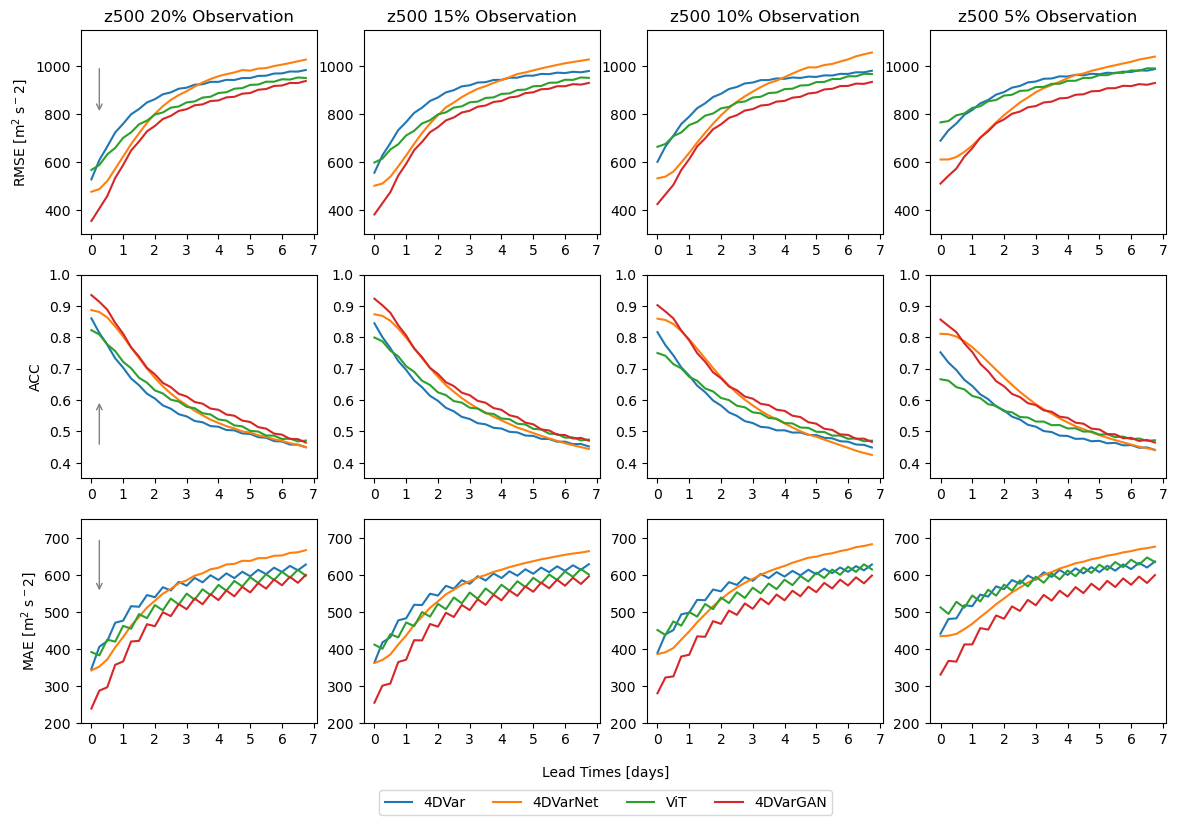

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(14, 9))
axes[0,0].plot(rmse["4DVar Obs20"], label=f"4DVar")
axes[0,0].plot(rmse["4DVarNet Obs20"], label=f"4DVarNet")
axes[0,0].plot(rmse["ViT Obs20"], label=f"ViT")
axes[0,0].plot(rmse["4DVarGAN Obs20"], label=f"4DVarGAN")
axes[0,1].plot(rmse["4DVar Obs15"], label=f"4DVar")
axes[0,1].plot(rmse["4DVarNet Obs15"], label=f"4DVarNet")
axes[0,1].plot(rmse["ViT Obs15"], label=f"ViT")
axes[0,1].plot(rmse["4DVarGAN Obs15"], label=f"4DVarGAN")
axes[0,2].plot(rmse["4DVar Obs10"], label=f"4DVar")
axes[0,2].plot(rmse["4DVarNet Obs10"], label=f"4DVarNet")
axes[0,2].plot(rmse["ViT Obs10"], label=f"ViT")
axes[0,2].plot(rmse["4DVarGAN Obs10"], label=f"4DVarGAN")
axes[0,3].plot(rmse["4DVar Obs5"], label=f"4DVar")
axes[0,3].plot(rmse["4DVarNet Obs5"], label=f"4DVarNet")
axes[0,3].plot(rmse["ViT Obs5"], label=f"ViT")
axes[0,3].plot(rmse["4DVarGAN Obs5"], label=f"4DVarGAN")

axes[1,0].plot(acc["4DVar Obs20"], label=f"4DVar")
axes[1,0].plot(acc["4DVarNet Obs20"], label=f"4DVarNet")
axes[1,0].plot(acc["ViT Obs20"], label=f"ViT")
axes[1,0].plot(acc["4DVarGAN Obs20"], label=f"4DVarGAN")
axes[1,1].plot(acc["4DVar Obs15"], label=f"4DVar")
axes[1,1].plot(acc["4DVarNet Obs15"], label=f"4DVarNet")
axes[1,1].plot(acc["ViT Obs15"], label=f"ViT")
axes[1,1].plot(acc["4DVarGAN Obs15"], label=f"4DVarGAN")
axes[1,2].plot(acc["4DVar Obs10"], label=f"4DVar")
axes[1,2].plot(acc["4DVarNet Obs10"], label=f"4DVarNet")
axes[1,2].plot(acc["ViT Obs10"], label=f"ViT")
axes[1,2].plot(acc["4DVarGAN Obs10"], label=f"4DVarGAN")
axes[1,3].plot(acc["4DVar Obs5"], label=f"4DVar")
axes[1,3].plot(acc["4DVarNet Obs5"], label=f"4DVarNet")
axes[1,3].plot(acc["ViT Obs5"], label=f"ViT")
axes[1,3].plot(acc["4DVarGAN Obs5"], label=f"4DVarGAN")

axes[2,0].plot(mae["4DVar Obs20"], label=f"4DVar")
axes[2,0].plot(mae["4DVarNet Obs20"], label=f"4DVarNet")
axes[2,0].plot(mae["ViT Obs20"], label=f"ViT")
axes[2,0].plot(mae["4DVarGAN Obs20"], label=f"4DVarGAN")
axes[2,1].plot(mae["4DVar Obs15"], label=f"4DVar")
axes[2,1].plot(mae["4DVarNet Obs15"], label=f"4DVarNet")
axes[2,1].plot(mae["ViT Obs15"], label=f"ViT")
axes[2,1].plot(mae["4DVarGAN Obs15"], label=f"4DVarGAN")
axes[2,2].plot(mae["4DVar Obs10"], label=f"4DVar")
axes[2,2].plot(mae["4DVarNet Obs10"], label=f"4DVarNet")
axes[2,2].plot(mae["ViT Obs10"], label=f"ViT")
axes[2,2].plot(mae["4DVarGAN Obs10"], label=f"4DVarGAN")
axes[2,3].plot(mae["4DVar Obs5"], label=f"4DVar")
axes[2,3].plot(mae["4DVarNet Obs5"], label=f"4DVarNet")
axes[2,3].plot(mae["ViT Obs5"], label=f"ViT")
axes[2,3].plot(mae["4DVarGAN Obs5"], label=f"4DVarGAN")

for i in range(4):
    axes[0,i].set_ylim(300, 1150)
    axes[1,i].set_ylim(0.35, 1)
    axes[2,i].set_ylim(200, 750)
    axes[0,i].set_title(f"{NAME_TO_VAR[f'{VARIABLE}_{LEVEL}']}{LEVEL} {int(20-5*i)}% Observation")
    for j in range(3):
        axes[j,i].set_xticks(np.arange(0, 32, 4))
        axes[j,i].set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7])


axes[0,0].annotate('', xy=(1,800), xytext=(1,1000), arrowprops=dict(color='gray', arrowstyle='->'), rotation=90)
axes[1,0].annotate('', xy=(1,0.6), xytext=(1,0.45), arrowprops=dict(color='gray', arrowstyle='->'), rotation=90)
axes[2,0].annotate('', xy=(1,550), xytext=(1,700), arrowprops=dict(color='gray', arrowstyle='->'), rotation=90)

axes[0,0].set_ylabel(f"RMSE [m$^2$ s$^{-2}$]")
axes[1,0].set_ylabel(f"ACC")
axes[2,0].set_ylabel(f"MAE [m$^2$ s$^{-2}$]")
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, ncol=4, loc='lower center', bbox_to_anchor=(0.5, 0))
fig.text(0.5, 0.05, f"Lead Times [days]", ha='center')
plt.savefig(f"forecast_{NAME_TO_VAR[f'{VARIABLE}_{LEVEL}']}{LEVEL}.pdf",dpi=300, bbox_inches="tight")

In [15]:
for k in rmse.keys():
    print(f"RMSE of {k}: ", rmse[k][12])

RMSE of 4DVar Obs20:  909.18896
RMSE of 4DVarNet Obs20:  894.613
RMSE of ViT Obs20:  847.91077
RMSE of 4DVarGAN Obs20:  819.5166
RMSE of 4DVar Obs15:  919.23883
RMSE of 4DVarNet Obs15:  888.1757
RMSE of ViT Obs15:  848.1637
RMSE of 4DVarGAN Obs15:  813.0814
RMSE of 4DVar Obs10:  930.6613
RMSE of 4DVarNet Obs10:  892.796
RMSE of ViT Obs10:  868.1948
RMSE of 4DVarGAN Obs10:  819.7487
RMSE of 4DVar Obs5:  934.9359
RMSE of 4DVarNet Obs5:  890.20874
RMSE of ViT Obs5:  911.8728
RMSE of 4DVarGAN Obs5:  832.5917


In [16]:
for k in rmse.keys():
    print(f"RMSE of {k}: ", rmse[k][20])

RMSE of 4DVar Obs20:  949.4355
RMSE of 4DVarNet Obs20:  980.1853
RMSE of ViT Obs20:  920.8076
RMSE of 4DVarGAN Obs20:  887.0472
RMSE of 4DVar Obs15:  959.31616
RMSE of 4DVarNet Obs15:  981.20074
RMSE of ViT Obs15:  915.03644
RMSE of 4DVarGAN Obs15:  889.9466
RMSE of 4DVar Obs10:  954.17584
RMSE of 4DVarNet Obs10:  993.7281
RMSE of ViT Obs10:  932.4083
RMSE of 4DVarGAN Obs10:  888.6272
RMSE of 4DVar Obs5:  965.2456
RMSE of 4DVarNet Obs5:  987.3037
RMSE of ViT Obs5:  961.55176
RMSE of 4DVarGAN Obs5:  895.40375


In [17]:
for k in acc.keys():
    print(f"ACC of {k}: ", acc[k][12])

ACC of 4DVar Obs20:  0.5475849
ACC of 4DVarNet Obs20:  0.5836131
ACC of ViT Obs20:  0.5780347
ACC of 4DVarGAN Obs20:  0.6111761
ACC of 4DVar Obs15:  0.5393518
ACC of 4DVarNet Obs15:  0.58860123
ACC of ViT Obs15:  0.5753562
ACC of 4DVarGAN Obs15:  0.61513484
ACC of 4DVar Obs10:  0.5263347
ACC of 4DVarNet Obs10:  0.58249927
ACC of ViT Obs10:  0.5605047
ACC of 4DVarGAN Obs10:  0.6041089
ACC of 4DVar Obs5:  0.51477045
ACC of 4DVarNet Obs5:  0.586687
ACC of ViT Obs5:  0.5311745
ACC of 4DVarGAN Obs5:  0.58368033


In [18]:
for k in acc.keys():
    print(f"ACC of {k}: ", acc[k][20])

ACC of 4DVar Obs20:  0.4918363
ACC of 4DVarNet Obs20:  0.49595845
ACC of ViT Obs20:  0.5014532
ACC of 4DVarGAN Obs20:  0.52976924
ACC of 4DVar Obs15:  0.48526853
ACC of 4DVarNet Obs15:  0.4943774
ACC of ViT Obs15:  0.5078161
ACC of 4DVarGAN Obs15:  0.5224134
ACC of 4DVar Obs10:  0.48801836
ACC of 4DVarNet Obs10:  0.48268947
ACC of ViT Obs10:  0.49860084
ACC of 4DVarGAN Obs10:  0.5243077
ACC of 4DVar Obs5:  0.46968853
ACC of 4DVarNet Obs5:  0.48801714
ACC of ViT Obs5:  0.4895269
ACC of 4DVarGAN Obs5:  0.5059836


In [19]:
for k in mae.keys():
    print(f"MAE of {k}: ", mae[k][12])

MAE of 4DVar Obs20:  570.33386
MAE of 4DVarNet Obs20:  584.9966
MAE of ViT Obs20:  548.9095
MAE of 4DVarGAN Obs20:  506.84485
MAE of 4DVar Obs15:  575.3709
MAE of 4DVarNet Obs15:  582.3152
MAE of ViT Obs15:  551.8627
MAE of 4DVarGAN Obs15:  504.55573
MAE of 4DVar Obs10:  583.6844
MAE of 4DVarNet Obs10:  588.7227
MAE of ViT Obs10:  564.9433
MAE of 4DVarGAN Obs10:  508.05197
MAE of 4DVar Obs5:  586.21387
MAE of 4DVarNet Obs5:  588.667
MAE of ViT Obs5:  594.6886
MAE of 4DVarGAN Obs5:  517.5474


In [20]:
for k in mae.keys():
    print(f"MAE of {k}: ", mae[k][20])

MAE of 4DVar Obs20:  595.7355
MAE of 4DVarNet Obs20:  637.11346
MAE of ViT Obs20:  593.29535
MAE of 4DVarGAN Obs20:  552.11194
MAE of 4DVar Obs15:  602.5839
MAE of 4DVarNet Obs15:  636.43427
MAE of ViT Obs15:  591.52185
MAE of 4DVarGAN Obs15:  553.98975
MAE of 4DVar Obs10:  601.3027
MAE of 4DVarNet Obs10:  648.5493
MAE of ViT Obs10:  605.4609
MAE of 4DVarGAN Obs10:  552.9168
MAE of 4DVar Obs5:  606.95575
MAE of 4DVarNet Obs5:  645.7746
MAE of ViT Obs5:  627.07776
MAE of 4DVarGAN Obs5:  559.1914
